# IoT Central streaming to Azure Databricks

This python script is an example of how [IoT Central](https://azure.microsoft.com/services/iot-central/) can stream data to [Azure Databricks](https://azure.microsoft.com/services/databricks/) using Apache Spark. 

When this notebook runs in a Databricks workspace, the Python script:

1. Reads the streaming measurement data from from an IoT Central application.
1. Plots averaged humidity data by device to show a smoother plot.
1. Stores the data in the cluster.
1. Displays box plots with any outliers from the stored data.

## Configuring event hub connection strings

IoT Central can be set up to export data to Azure Event Hubs using the **Continuous data export** feature. This example uses a single event hub for streaming telemetry. 

The connection string in the following cell is for the telemetry event hub. For more information, see the how-to guide [Extend Azure IoT Central with custom analytics](https://docs.microsoft.com/azure/iot-central/howto-create-custom-analytics).

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

###### Event Hub Connection string ######
telementryEventHubConfig = {
  'eventhubs.connectionString' : '{your Event Hubs connection string}'
}

## Telemetry query
#### Initial query

This creates a streaming DataFrame from the telemtry event hub. A streaming DataFrame continuously updates as more data arrives.

In [0]:
telemetryDF = spark \
  .readStream \
  .format("eventhubs") \
  .options(**telementryEventHubConfig) \
  .load()



#### Extract the required data
This creates a new streaming DataFrame that contains the:
- `deviceId` from the event hub message body
- `enqueuedTime` from the event hub message body
- `humidity` from the event hub message body

The code converts the binary body field to JSON and then extracts the required fields from the JSON.

The `sourceSchema` structure is a partial schema for the `body` field that defines just the fields you need.

In [0]:
# Create a schema that describes the Body field
sourceSchema = StructType([
  StructField("deviceId", StringType(), True),
  StructField("enqueuedTime", TimestampType(), True),
  StructField("telemetry", StructType([
    StructField('humidity', FloatType(), True),
    StructField('temperature', FloatType(), True),
    StructField('pressure', FloatType(), True)
  ])),
])

# Convert the binary Body column to a string
telemetryDF = telemetryDF.withColumn("body", col("Body").cast("string")).select(col('body'))

# Convert the string to JSON and select the fields you need.
jsonOptions = {"dateFormat" : "yyyy-MM-dd HH:mm:ss.SSS"}
telemetryDF = telemetryDF.withColumn("Body", from_json(telemetryDF.body, sourceSchema, jsonOptions)) \
  .select(col('body.deviceId'),col('body.enqueuedTime'),col('body.telemetry.humidity'), \
  col('body.telemetry.temperature'),col('body.telemetry.pressure'))

# display(telemetryDF)

deviceId,enqueuedTime,humidity,temperature,pressure
n1zf88olzx,2022-05-17T09:55:40.795+0000,20.556147,33.211994,35.172993
3gcixaqbv8,2022-05-17T09:55:48.561+0000,41.45532,29.688524,75.30919
13lc5qomq3h,2022-05-17T09:56:16.063+0000,41.071503,41.1293,79.78603
n1zf88olzx,2022-05-17T09:56:55.649+0000,50.342705,38.500492,29.126913
3gcixaqbv8,2022-05-17T09:57:04.060+0000,69.69313,30.346428,42.83107
13lc5qomq3h,2022-05-17T09:57:30.625+0000,69.20482,16.31465,13.832059
n1zf88olzx,2022-05-17T09:58:10.298+0000,63.81027,51.748363,28.343994
3gcixaqbv8,2022-05-17T09:58:19.316+0000,34.10282,22.536898,37.326435
13lc5qomq3h,2022-05-17T09:58:45.464+0000,27.782513,50.9855,72.67426
n1zf88olzx,2022-05-17T09:59:24.841+0000,65.70804,41.49219,49.24361


### Plot the telemetry

The following code uses a window to calculate rolling averages by device Id.

Because the example is still using a streaming DataFrame, the chart updates continuously.

In [0]:
smoothTelemetryDF = telemetryDF.groupBy(
  window('enqueuedtime', "10 minutes", "5 minutes"),
  'deviceId'
).agg({'humidity': 'avg'})
display(smoothTelemetryDF)

window,deviceId,avg(humidity)
"List(2022-05-17T10:55:00.000+0000, 2022-05-17T11:05:00.000+0000)",n1zf88olzx,51.06802773475647
"List(2022-05-17T10:20:00.000+0000, 2022-05-17T10:30:00.000+0000)",13lc5qomq3h,49.3487024307251
"List(2022-05-17T10:45:00.000+0000, 2022-05-17T10:55:00.000+0000)",3gcixaqbv8,48.722333908081055
"List(2022-05-17T09:55:00.000+0000, 2022-05-17T10:05:00.000+0000)",13lc5qomq3h,48.94353321620396
"List(2022-05-17T09:50:00.000+0000, 2022-05-17T10:00:00.000+0000)",13lc5qomq3h,46.01961135864258
"List(2022-05-17T10:30:00.000+0000, 2022-05-17T10:40:00.000+0000)",13lc5qomq3h,51.02244567871094
"List(2022-05-17T10:15:00.000+0000, 2022-05-17T10:25:00.000+0000)",3gcixaqbv8,48.06471490859985
"List(2022-05-17T11:05:00.000+0000, 2022-05-17T11:15:00.000+0000)",3gcixaqbv8,74.37354278564453
"List(2022-05-17T10:35:00.000+0000, 2022-05-17T10:45:00.000+0000)",13lc5qomq3h,49.80582618713379
"List(2022-05-17T11:05:00.000+0000, 2022-05-17T11:15:00.000+0000)",n1zf88olzx,19.86078643798828


## Analyze the telemetry further 

To perform more complex analysis, the following cell continuously writes the streaming data to a table in the cluster. The amount of data stored will continue to grow, so in a production system you should periodically delete or archive old telemetry data.

###Write streaming data query results to a database
Writes the final telemetryDF DataFrame to a [database table](https://docs.azuredatabricks.net/user-guide/tables.html) in the cluster. You could choose to write the telemetry to another storage location such as an external database or blob store.

For more information, see [Streaming Data Sources and Sinks](https://docs.azuredatabricks.net/spark/latest/structured-streaming/data-sources.html).

In [0]:
telemetryDF \
    .writeStream \
    .outputMode("append") \
    .format("delta") \
    .option("checkpointLocation", "/delta/events/_checkpoints/etl-from-json") \
    .table("telemetry")

Out[6]: <pyspark.sql.streaming.StreamingQuery at 0x7fafc5f40190>

Wait until some streaming data has been written to storage.

In [0]:
from time import sleep
sleep(60) # wait until some telemtry has been written to storage

### Generate box plots
The format of the stored data is not suitable for using the Matplotlib [boxplot](https://matplotlib.org/gallery/statistics/boxplot_demo.html) function. It's also not possible to *pivot* streaming data - this is why the previous cell wrote the streaming data to the filesystem.

The following code:
1. Generates a list of device Ids to use as column headings.
1. Loads and pivots the stored data and then converts it to a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
1. Uses Matplotlib to generate a [box plot](https://en.wikipedia.org/wiki/Box_plot)

A box plot is a way to show the spread of data and any outliers. The chart shows hourly box plots for each device. You need to wait for some time to see multiple hourly plots.

Note: this chart isn't based on streaming data so you need to manually update it by re-running the cell.

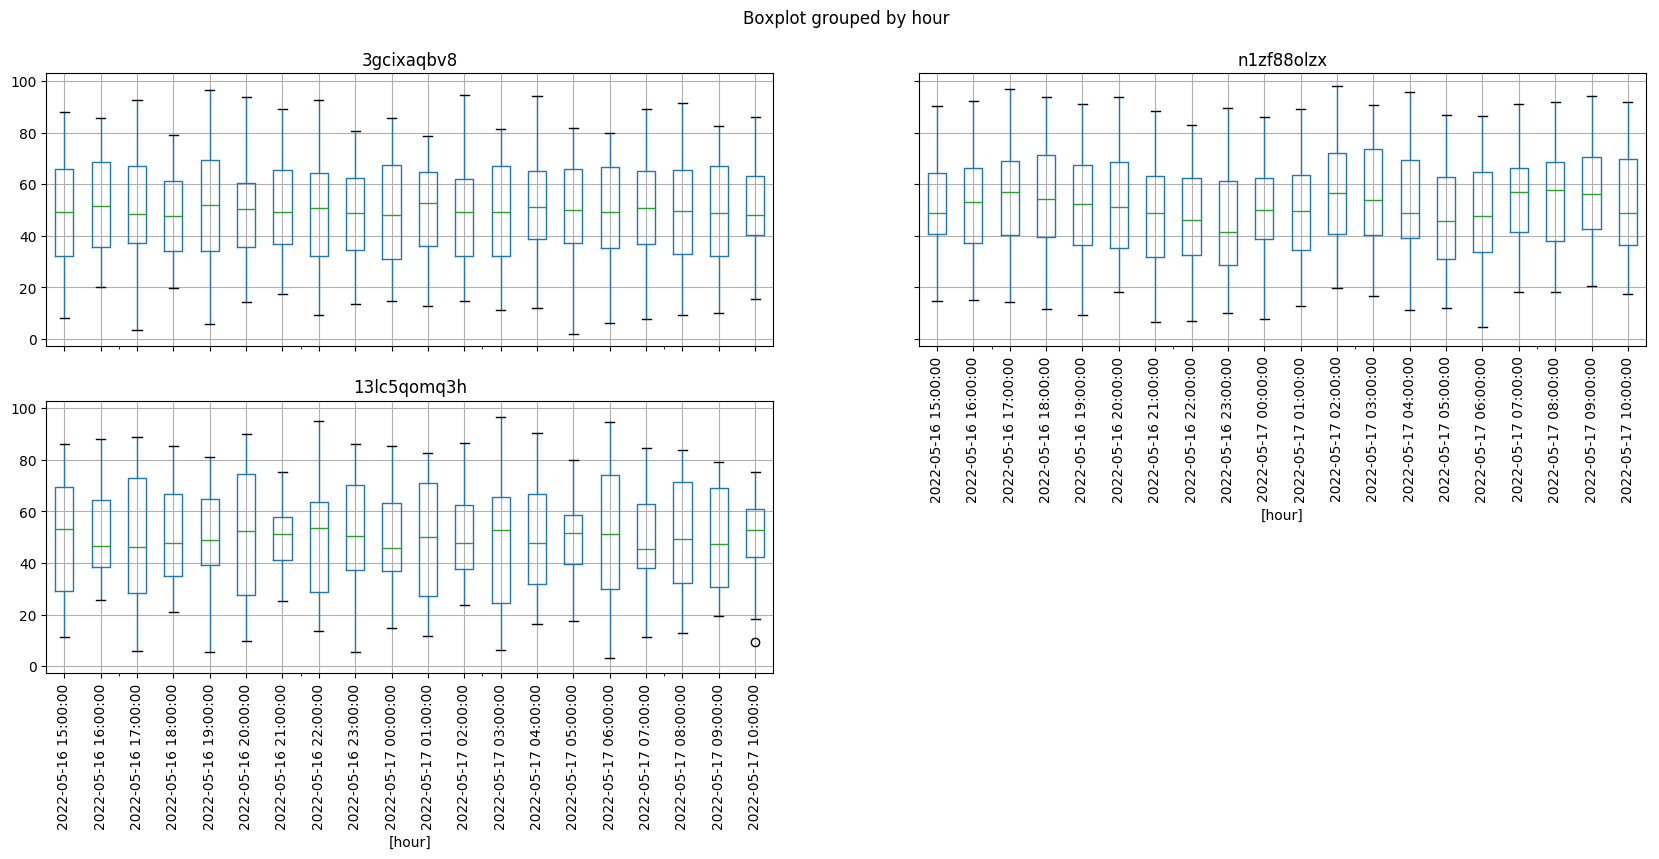

In [0]:
import matplotlib.pyplot as plt

# Get list of distinct deviceId values
devicelist = spark.table('telemetry').select(collect_set('deviceId').alias('deviceId')).first()['deviceId']

# Pivot and convert to a pandas dataframe
pdDF = spark.table('telemetry').groupBy('enqueuedtime').pivot('deviceId').mean('humidity').orderBy('enqueuedtime').withColumn('hour', date_trunc('hour', 'enqueuedtime')).toPandas()

# Use the pandas plotting function
plt.clf()
pdDF.boxplot(column=devicelist, by=['hour'], rot=90, fontsize='medium', layout=(2,2), figsize=(20,8))
display()